# Exploratory Data Analysis (EDA)
This notebook will go through the data and try to understand the data and its features.

## Summary of Findings
**Feature relationships:**
* $x0$ shows a somewhat linear relationship with the target variable, as evidenced by scatter plots and a relatively high Pearson correlation coefficient. This suggests that $x0$ has a significant linear influence on the target.
* $x1$, on the other hand, does not exhibit a clear linear relationship with the target. The scatter plots and a low correlation coefficient indicate a non-linear relationship
* The correlation matrix shows that $x0$ has a relatively high correlation with the target $(\rho = 0.667)$, while $x1$ has a very low correlation with the target $(\rho = 0.034)$.
  
**Feature distributions:**
* Both features are uniformly distributed across the training and test datasets, $x \in [-1, 1]$

**Training and test data comparison:**
* The consistency between training and test datasets suggests that the test set is representative of the training set, which is crucial for the generalizability of any predictive model developed using this data.
* There are no missing values in the training and test datasets, which is a good sign for the quality of the data.

## Setup

In [26]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
%autoreload 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')

In [29]:
from data_loader import get_data

## Loading the data

In [30]:
X_train, y_train, X_test, y_test = get_data(n_train=280, n_test=120)

# Load train and test data into pandas dataframes
train_data = pd.DataFrame(X_train, columns=['x0', 'x1'])
train_data['y'] = y_train

test_data = pd.DataFrame(X_test, columns=['x0', 'x1'])
test_data['y'] = y_test

train_data.head()

,x0,x1,y
0,0.863409,0.327222,0.281765
1,-0.897453,-0.134329,-0.090207
2,-0.432824,-0.797043,0.436865
3,-0.221176,-0.566784,0.100678
4,0.204153,0.334664,0.137892


## Visualizing the data

<Axes: title={'center': 'Training data'}, xlabel='x0', ylabel='x1'>

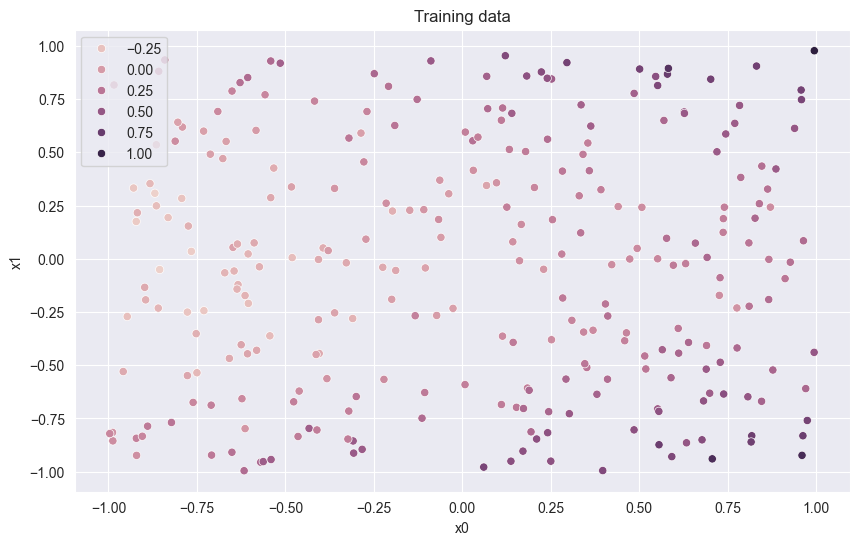

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Training data')
sns.scatterplot(x=train_data["x0"], y=train_data["x1"], hue=y_train)

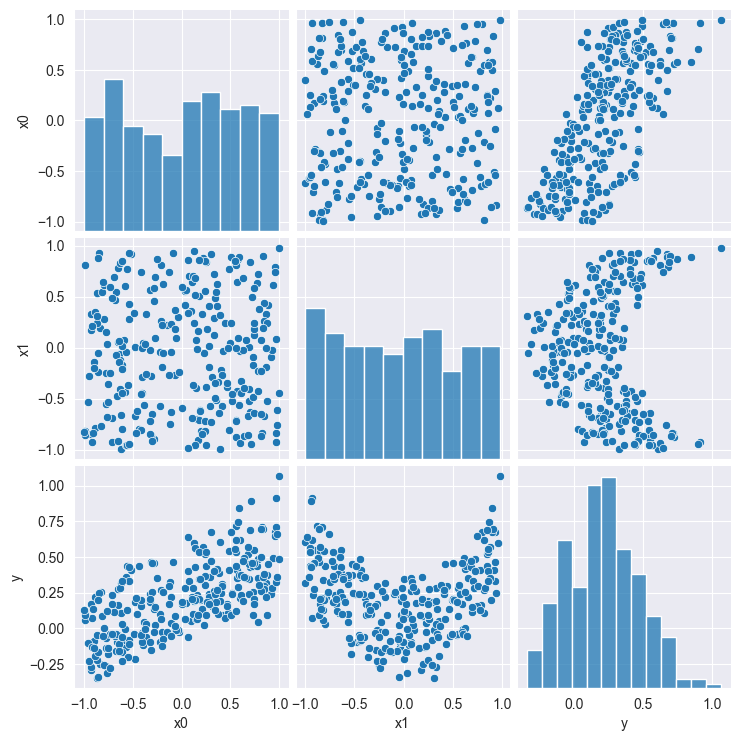

In [32]:
sns.pairplot(train_data, kind='scatter')
plt.show()

### Distribution of the Target Variable


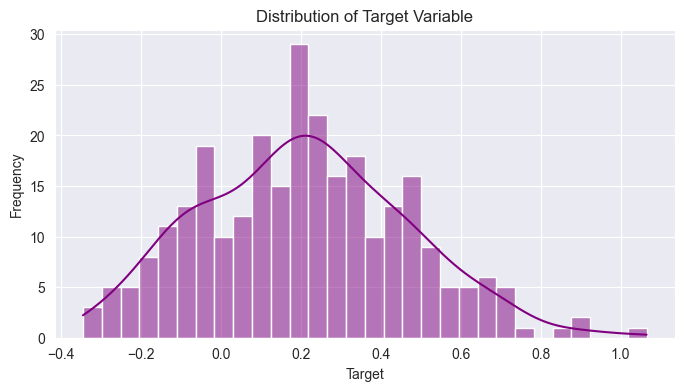

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(train_data['y'], bins=30, kde=True, color='purple')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


## Understanding the data

In [34]:
train_data.describe()

,x0,x1,y
count,280.000000,280.000000,280.000000
mean,0.015904,-0.047055,0.207818
std,0.586982,0.575270,0.258508
min,-0.996250,-0.995867,-0.345004
25%,-0.547101,-0.563818,0.015117
50%,0.110748,-0.029169,0.202037
75%,0.552507,0.428238,0.372395
max,0.995277,0.977233,1.065222


From the statistical summary one can see that the features have means close to 0, indicating that the data for these features is centered around 0 and being uniform distribution between -1 and 1.
The standard deviation is $0.55 \pm 0.1$

The minimum and maximum values for the features confirm that the features $x \in [-1,1]$

### Missing Values Analysis

In [43]:
# Nan values
nans_in_train: int = train_data.isna().sum()
nans_in_test: int = test_data.isna().sum()

print(f'Nan values in train data: \n{nans_in_train}')
print(f'Nan values in test data: \n{nans_in_test}')

Nan values in train data: 
x0    0
x1    0
y     0
dtype: int64
Nan values in test data: 
x0    0
x1    0
y     0
dtype: int64


There are no missing values in the training and test datasets.

### Correlation Analysis

<Axes: >

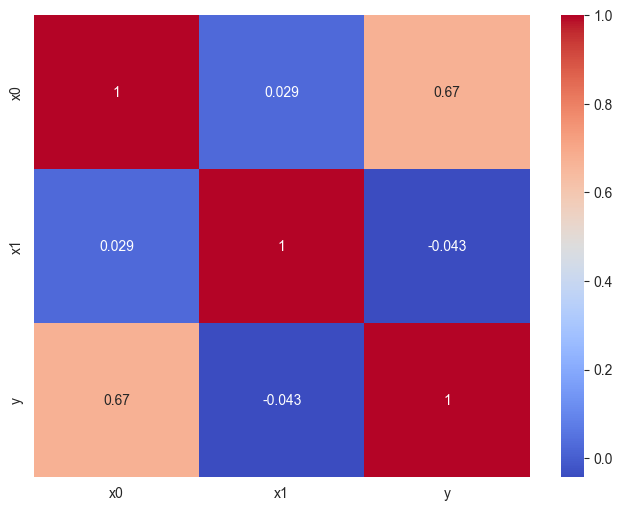

In [41]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

The correlation matrix shows that $x0$ has a relatively high correlation with the target $(\rho = 0.667)$, while $x1$ has a very low correlation with the target $(\rho = 0.034)$.

## Check for differences in train and test data

In [35]:
# Comparing Summary Statistics
comparison_summary = pd.concat([train_data.describe().rename(columns=lambda x: x + '_train'), 
                                 test_data.describe().rename(columns=lambda x: x + '_test')], axis=1)
comparison_summary

,x0_train,x1_train,y_train,x0_test,x1_test,y_test
count,280.000000,280.000000,280.000000,120.000000,120.000000,120.000000
mean,0.015904,-0.047055,0.207818,0.078187,-0.021791,0.216245
std,0.586982,0.575270,0.258508,0.543071,0.572691,0.254711
min,-0.996250,-0.995867,-0.345004,-0.981918,-0.981137,-0.300708
25%,-0.547101,-0.563818,0.015117,-0.389369,-0.545145,0.041697
50%,0.110748,-0.029169,0.202037,0.081844,-0.015457,0.215537
75%,0.552507,0.428238,0.372395,0.533450,0.453781,0.371623
max,0.995277,0.977233,1.065222,0.986749,0.999632,0.971673


The train and test data are similar in terms of the distribution of the features. The mean and standard deviation of the features are similar in both the train and test data.

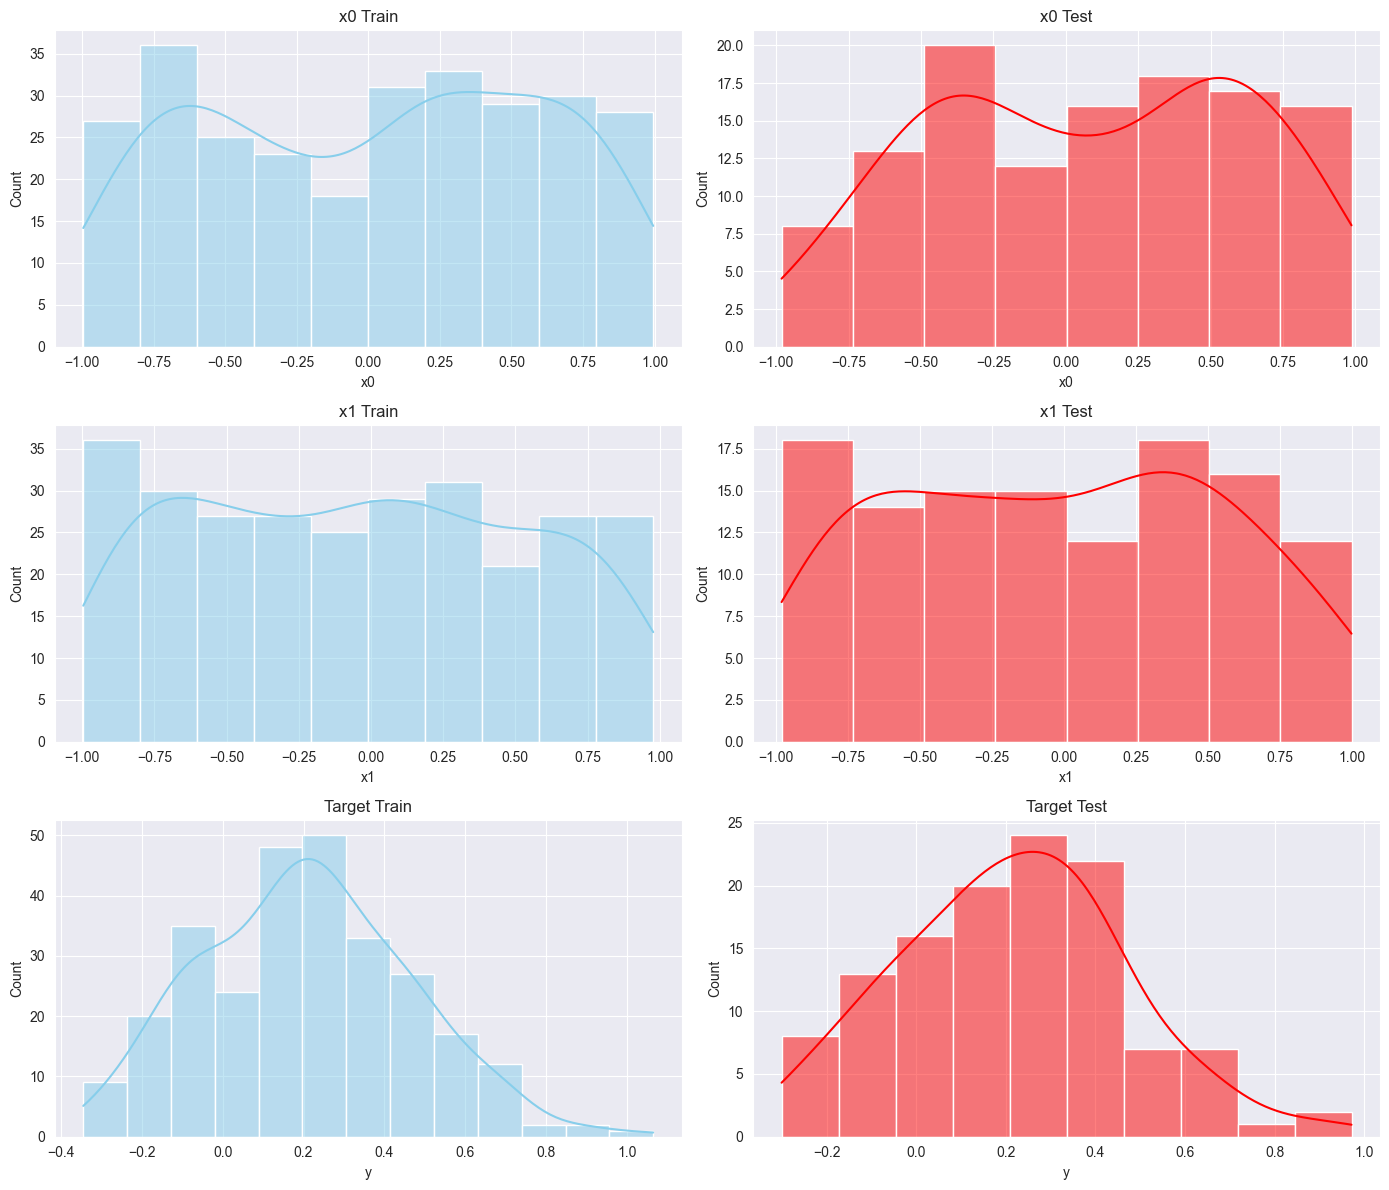

,x0_train,x1_train,y_train,x0_test,x1_test,y_test
count,280.000000,280.000000,280.000000,120.000000,120.000000,120.000000
mean,0.015904,-0.047055,0.207818,0.078187,-0.021791,0.216245
std,0.586982,0.575270,0.258508,0.543071,0.572691,0.254711
min,-0.996250,-0.995867,-0.345004,-0.981918,-0.981137,-0.300708
25%,-0.547101,-0.563818,0.015117,-0.389369,-0.545145,0.041697
50%,0.110748,-0.029169,0.202037,0.081844,-0.015457,0.215537
75%,0.552507,0.428238,0.372395,0.533450,0.453781,0.371623
max,0.995277,0.977233,1.065222,0.986749,0.999632,0.971673


In [37]:
# Visual Comparison of Distributions between Training and Testing Sets
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Feature 1
sns.histplot(train_data['x0'], kde=True, color="skyblue", ax=axes[0, 0], label='Train').set_title('x0 Train')
sns.histplot(test_data['x0'], kde=True, color="red", ax=axes[0, 1], label='Test').set_title('x0 Test')

# Feature 2
sns.histplot(train_data['x1'], kde=True, color="skyblue", ax=axes[1, 0], label='Train').set_title('x1 Train')
sns.histplot(test_data['x1'], kde=True, color="red", ax=axes[1, 1], label='Test').set_title('x1 Test')

# Target
sns.histplot(train_data['y'], kde=True, color="skyblue", ax=axes[2, 0], label='Train').set_title('Target Train')
sns.histplot(test_data['y'], kde=True, color="red", ax=axes[2, 1], label='Test').set_title('Target Test')

plt.tight_layout()
plt.show()

comparison_summary